In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
%matplotlib inline


In [2]:
plt.rcParams['font.size'] = 25
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.style'] = 'normal'

In [3]:
data = pd.read_csv('../../data/bus_stop_times_poi_data_added.csv')

In [4]:
model = xgb.XGBClassifier()
comp_model = xgb.XGBClassifier()

In [5]:
lab = LabelEncoder()
data['stop_type'] = lab.fit_transform(data['stop_type'])

In [6]:
features = ['deviceid','week_no','day_of_week','time_of_day','Sunday/holiday','weekday/end','bus_stop','precip','temp',
            'dt(n-1)','dt(n-2)', 'dt(n-3)','dt(t-1)', 'dt(t-2)', 'dt(w-1)', 'dt(w-2)', 'dt(w-3)', 'rt(n-1)','place_of_worship','place_of_education', 'healthcare', 
'tourist_attractions', 'commercial_places', 'public_places','total_poi_count', 'average_poi_distance','stop_type']
test_data = data[features]
test_data = test_data[test_data['week_no']>36]
test_data.reset_index(drop = True, inplace = True)
test_data = test_data.drop("week_no",axis = 1)


In [7]:
model.load_model('../../models/stop_type_classifier_model_with_POI.json')
comp_model.load_model('../../models/stop_type_classifier_model.json')

In [8]:
comp_features = ['deviceid','week_no','day_of_week','time_of_day','Sunday/holiday','weekday/end','bus_stop','precip','temp',
            'dt(n-1)','dt(n-2)', 'dt(n-3)','dt(t-1)', 'dt(t-2)', 'dt(w-1)', 'dt(w-2)', 'dt(w-3)', 'rt(n-1)','stop_type']
comp_test_data = data[comp_features]
comp_test_data = comp_test_data[comp_test_data['week_no']>36]
comp_test_data.reset_index(drop = True, inplace = True)
comp_test_data = comp_test_data.drop("week_no",axis = 1)

In [9]:
X_test = test_data.copy()
X_test.pop('stop_type')

0        2
1        1
2        1
3        0
4        2
        ..
15077    1
15078    0
15079    0
15080    1
15081    0
Name: stop_type, Length: 15082, dtype: int32

In [10]:
comp_X_test = comp_test_data.copy()
comp_X_test.pop('stop_type')

0        2
1        1
2        1
3        0
4        2
        ..
15077    1
15078    0
15079    0
15080    1
15081    0
Name: stop_type, Length: 15082, dtype: int32

In [11]:
explainer= shap.TreeExplainer(model)
shap_values= explainer.shap_values(X_test)


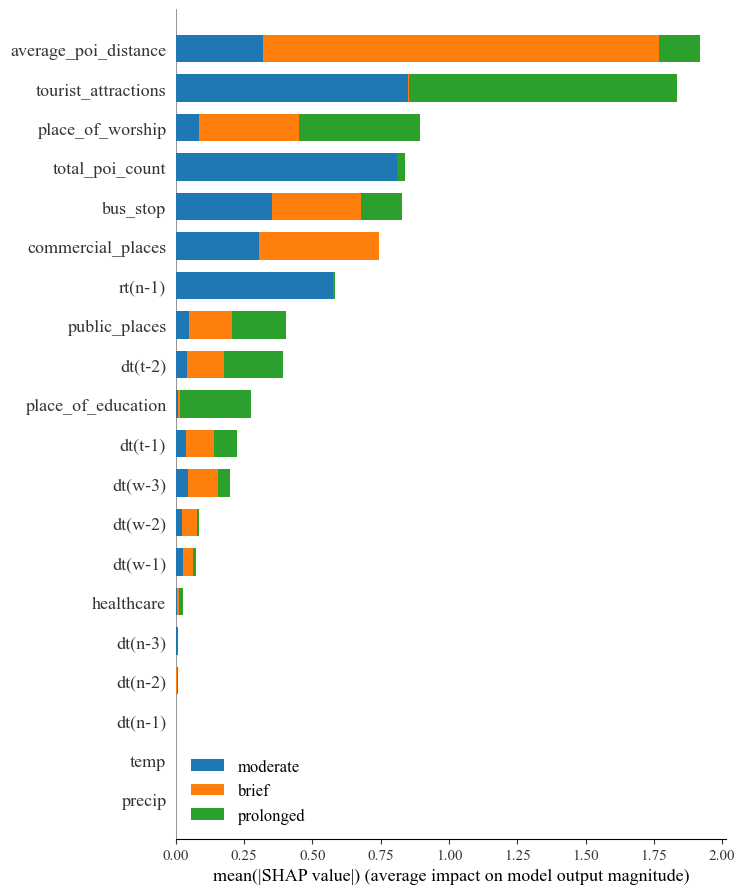

In [12]:
shap.summary_plot(shap_values,X_test,class_names=['brief','moderate','prolonged'], color=plt.get_cmap("tab10"))


In [13]:
model.classes_

array([0, 1, 2])

In [14]:
shap_v_class_0 =pd.DataFrame((zip(X_test.columns[np.argsort(np.abs(shap_values[0]).mean(0))],
np.abs(shap_values[0]).mean(0))), columns=["feature", "importance" ]).sort_values(by="importance", ascending=True)

In [15]:
shap_v_class_1 =pd.DataFrame((zip(X_test.columns[np.argsort(np.abs(shap_values[1]).mean(0))],
np.abs(shap_values[1]).mean(0))), columns=["feature", "importance" ]).sort_values(by="importance", ascending=True)

In [16]:
shap_v_class_2 =pd.DataFrame((zip(X_test.columns[np.argsort(np.abs(shap_values[2]).mean(0))],
np.abs(shap_values[2]).mean(0))), columns=["feature", "importance" ]).sort_values(by="importance", ascending=True)

In [17]:
comp_explainer = shap.TreeExplainer(comp_model)
comp_shap_values = comp_explainer.shap_values(comp_X_test)

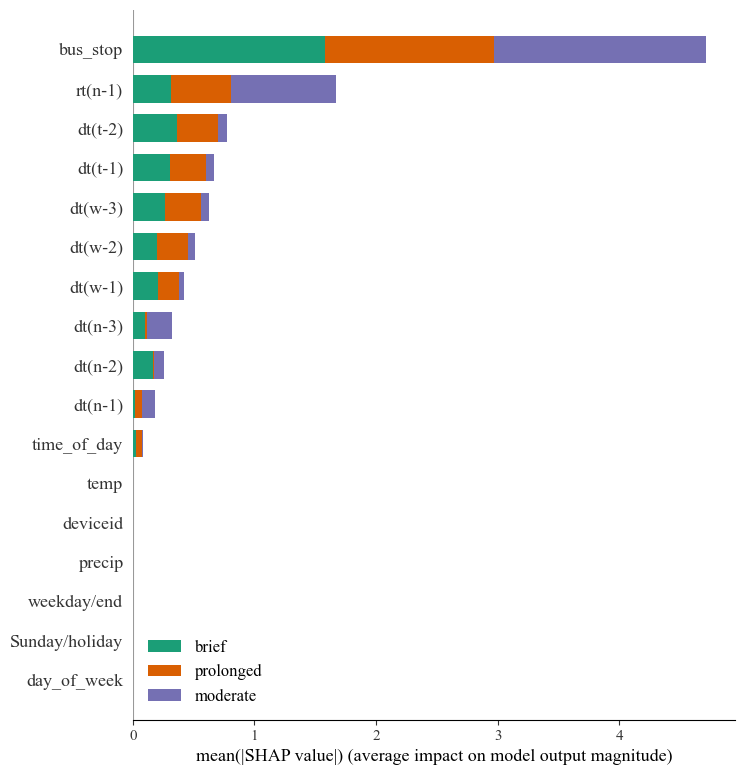

In [18]:
shap.summary_plot(comp_shap_values,comp_X_test,class_names={0:'brief',1:'moderate',2:'prolonged'}, color=plt.get_cmap("Dark2"))


In [19]:
shap_comp_class_0 =pd.DataFrame((zip(comp_X_test.columns[np.argsort(np.abs(comp_shap_values[0]).mean(0))],
                                     np.abs(comp_shap_values[0]).mean(0))), columns=["feature", "importance" ]).sort_values(by="importance", ascending=True)

In [20]:
shap_comp_class_1 =pd.DataFrame((zip(comp_X_test.columns[np.argsort(np.abs(comp_shap_values[1]).mean(0))],
                                     np.abs(comp_shap_values[1]).mean(0))), columns=["feature", "importance" ]).sort_values(by="importance", ascending=True)

In [21]:
shap_comp_class_2 =pd.DataFrame((zip(comp_X_test.columns[np.argsort(np.abs(comp_shap_values[2]).mean(0))],
                                     np.abs(comp_shap_values[2]).mean(0))), columns=["feature", "importance" ]).sort_values(by="importance", ascending=True)

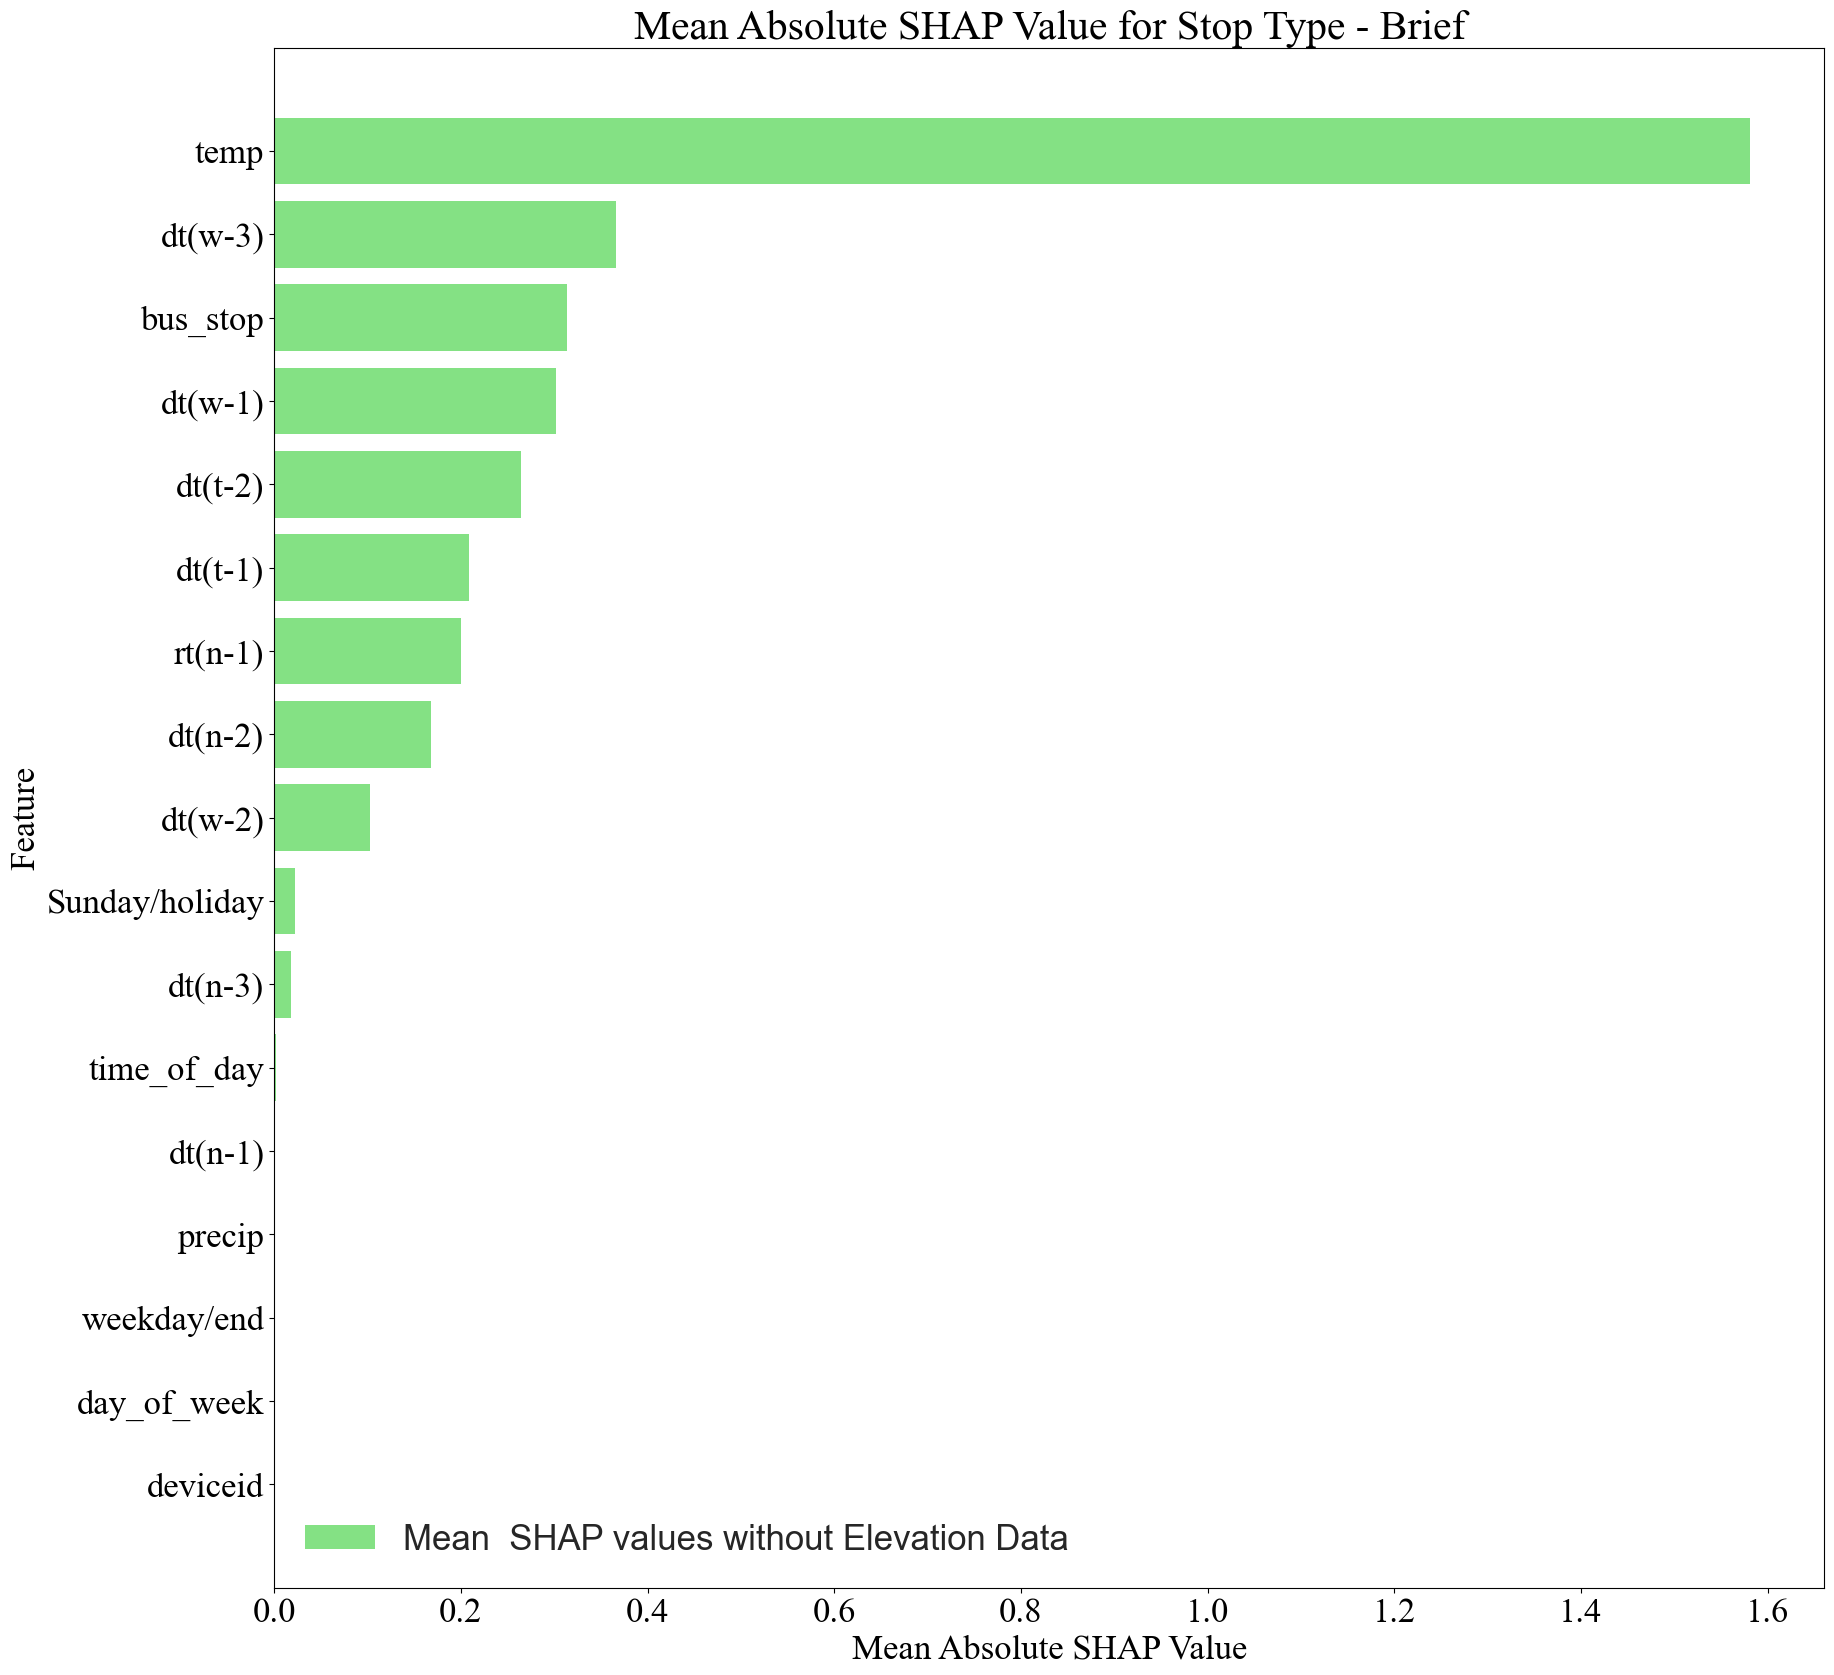

In [22]:
fig, ax = plt.subplots(figsize=[20,20])
plt.style.use('seaborn-v0_8-darkgrid')
ax.barh(y = shap_comp_class_0['feature'],width=shap_comp_class_0['importance'], color = 'limegreen',label = "Mean  SHAP values without Elevation Data",alpha = 0.6)
plt.title("Mean Absolute SHAP Value for Stop Type - Brief")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.legend()

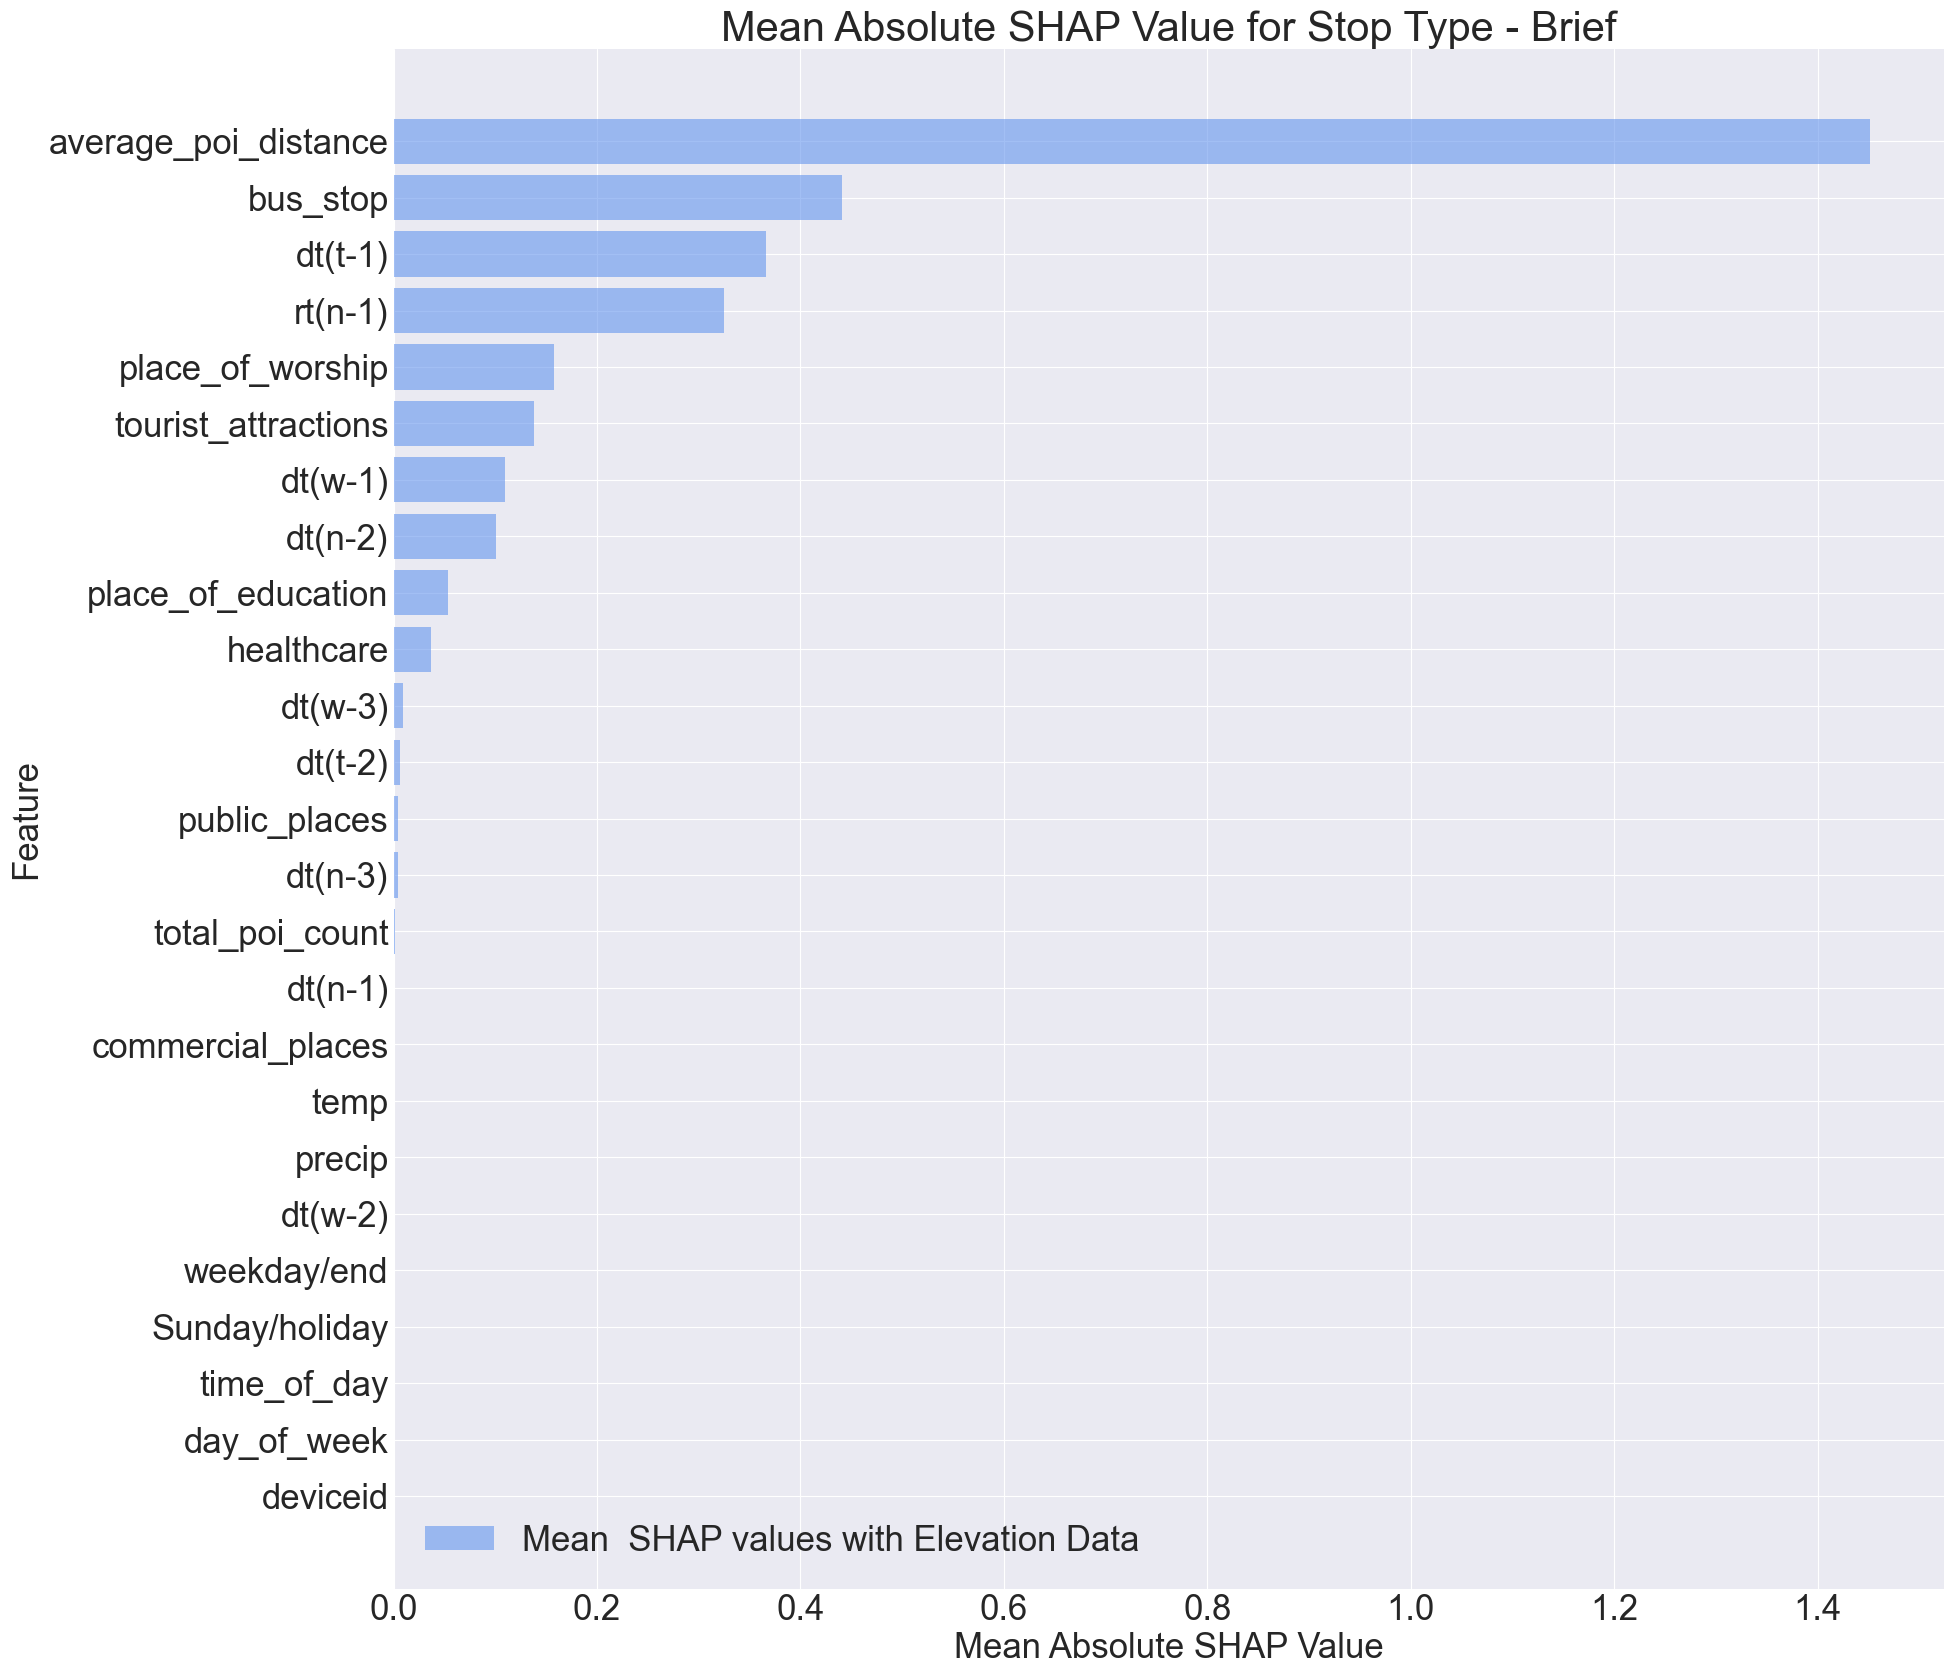

In [23]:
fig, ax = plt.subplots(figsize=[20,20])
plt.style.use('seaborn-v0_8-darkgrid')
ax.barh(y = shap_v_class_0['feature'],width=shap_v_class_0['importance'], color = 'cornflowerblue',label = "Mean  SHAP values with Elevation Data", alpha = 0.6)
plt.title("Mean Absolute SHAP Value for Stop Type - Brief")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.legend()

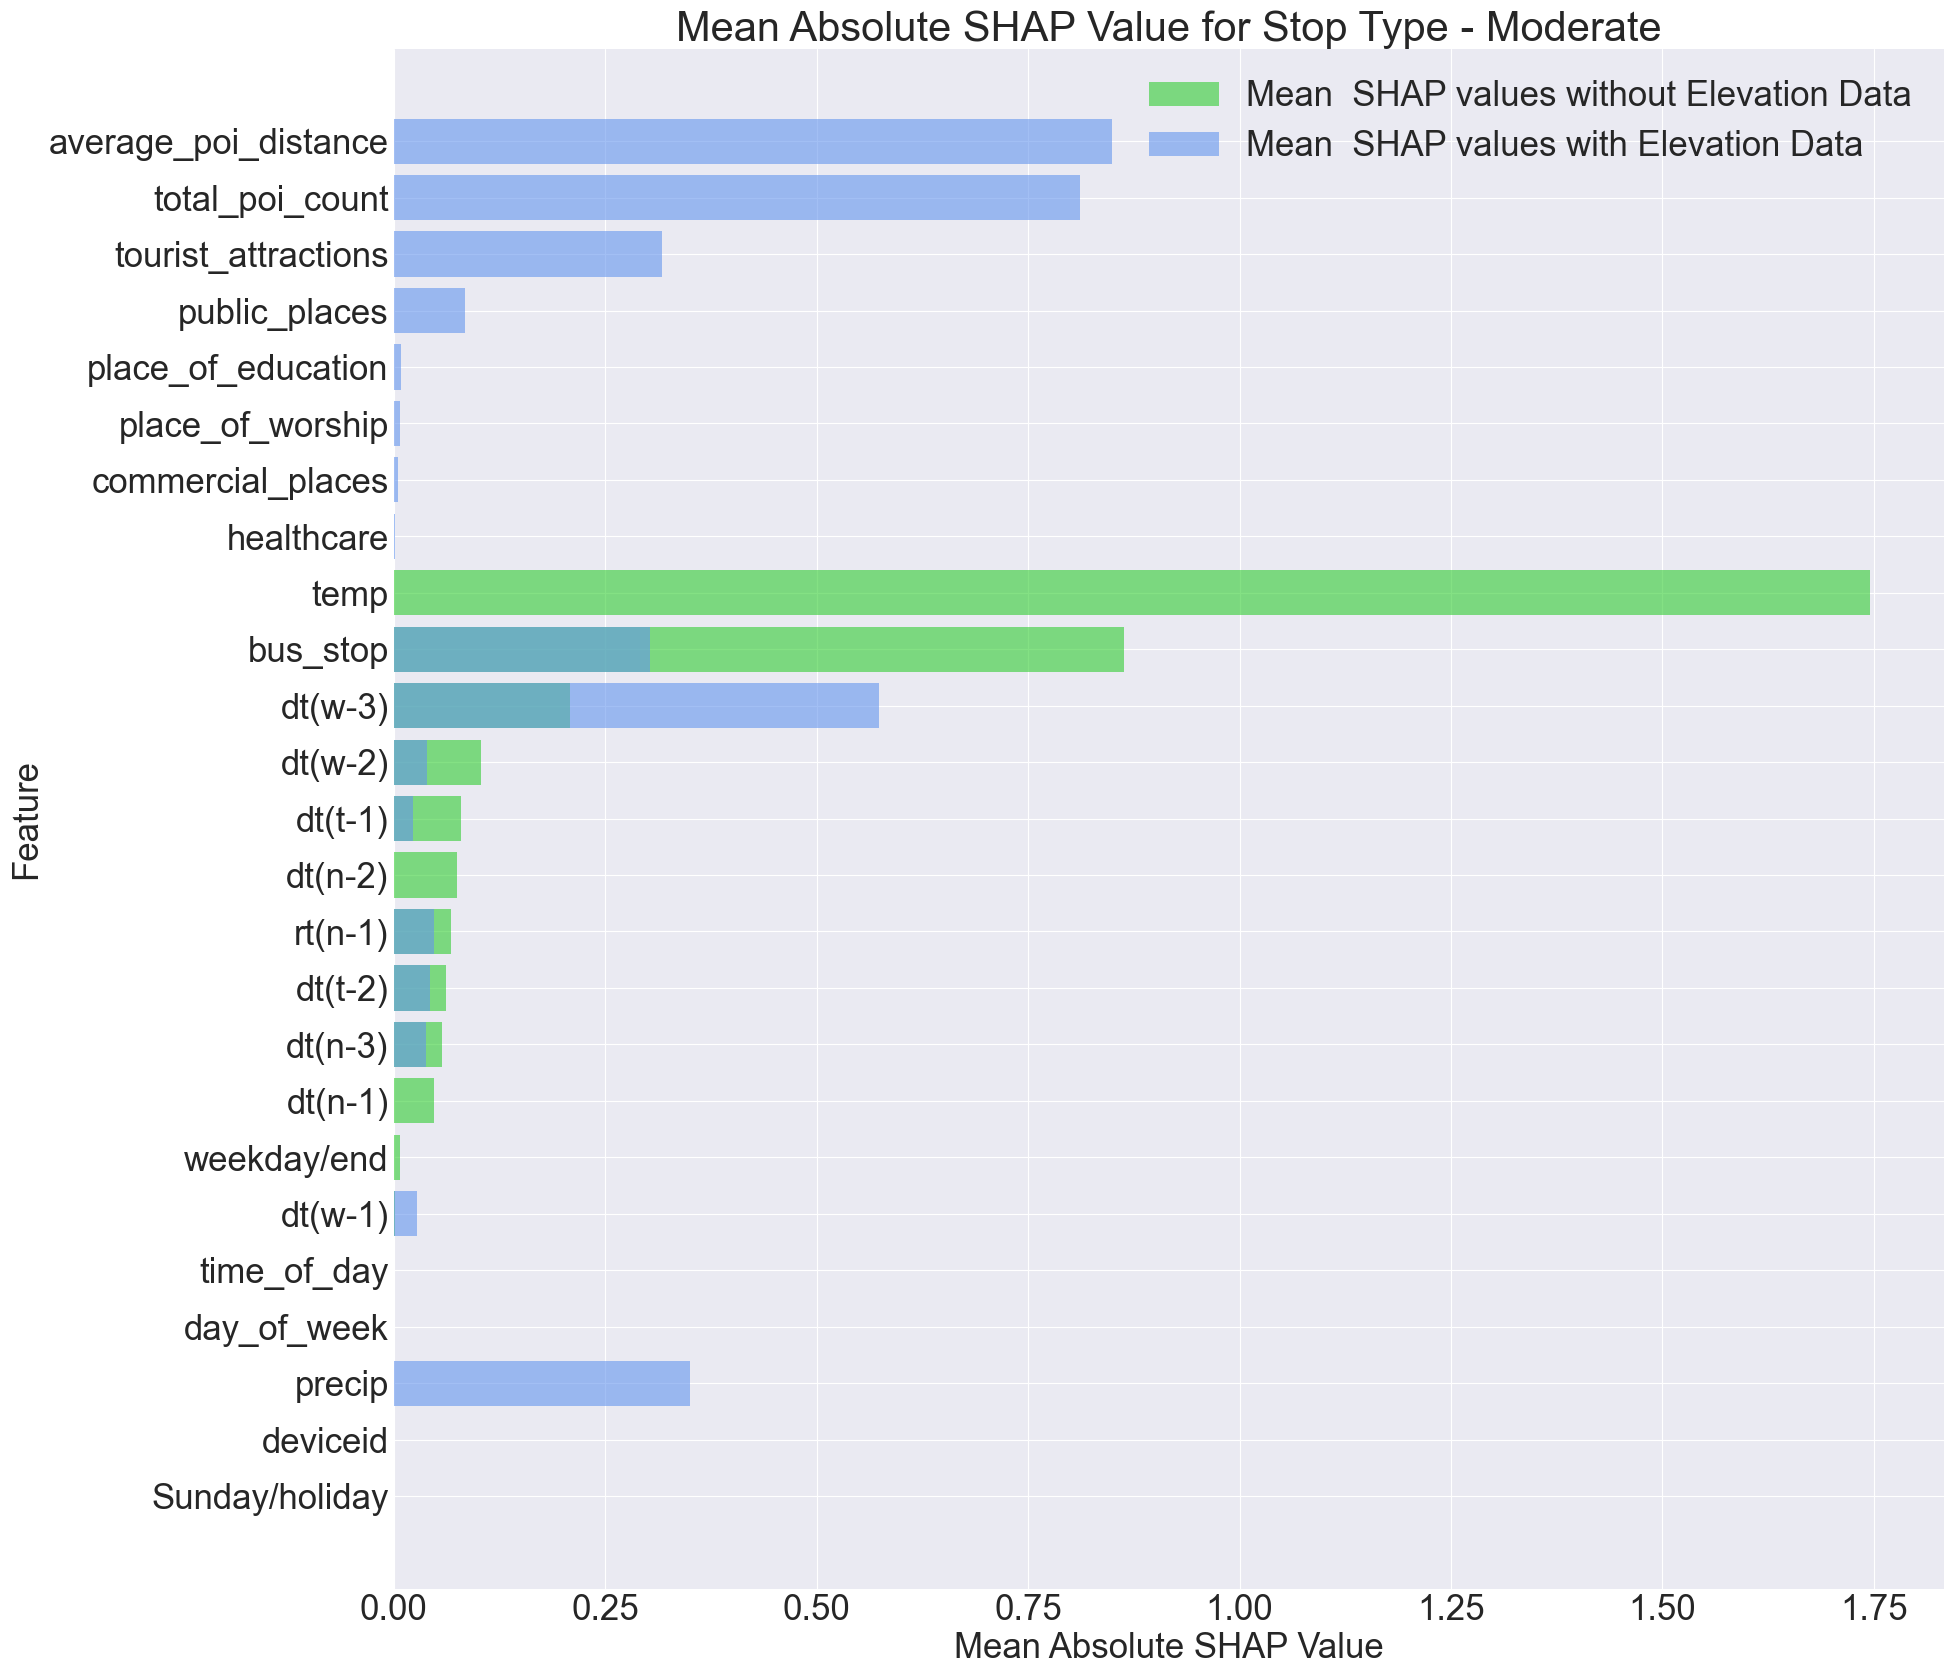

In [24]:
fig, ax = plt.subplots(figsize=[20,20])
plt.style.use('seaborn-v0_8-darkgrid')
ax.barh(y = shap_comp_class_1['feature'],width=shap_comp_class_1['importance'], color = 'limegreen',label = "Mean  SHAP values without Elevation Data",alpha = 0.6)
ax.barh(y = shap_v_class_1['feature'],width=shap_v_class_1['importance'], color = 'cornflowerblue',label = "Mean  SHAP values with Elevation Data", alpha = 0.6)
plt.title("Mean Absolute SHAP Value for Stop Type - Moderate")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.legend()

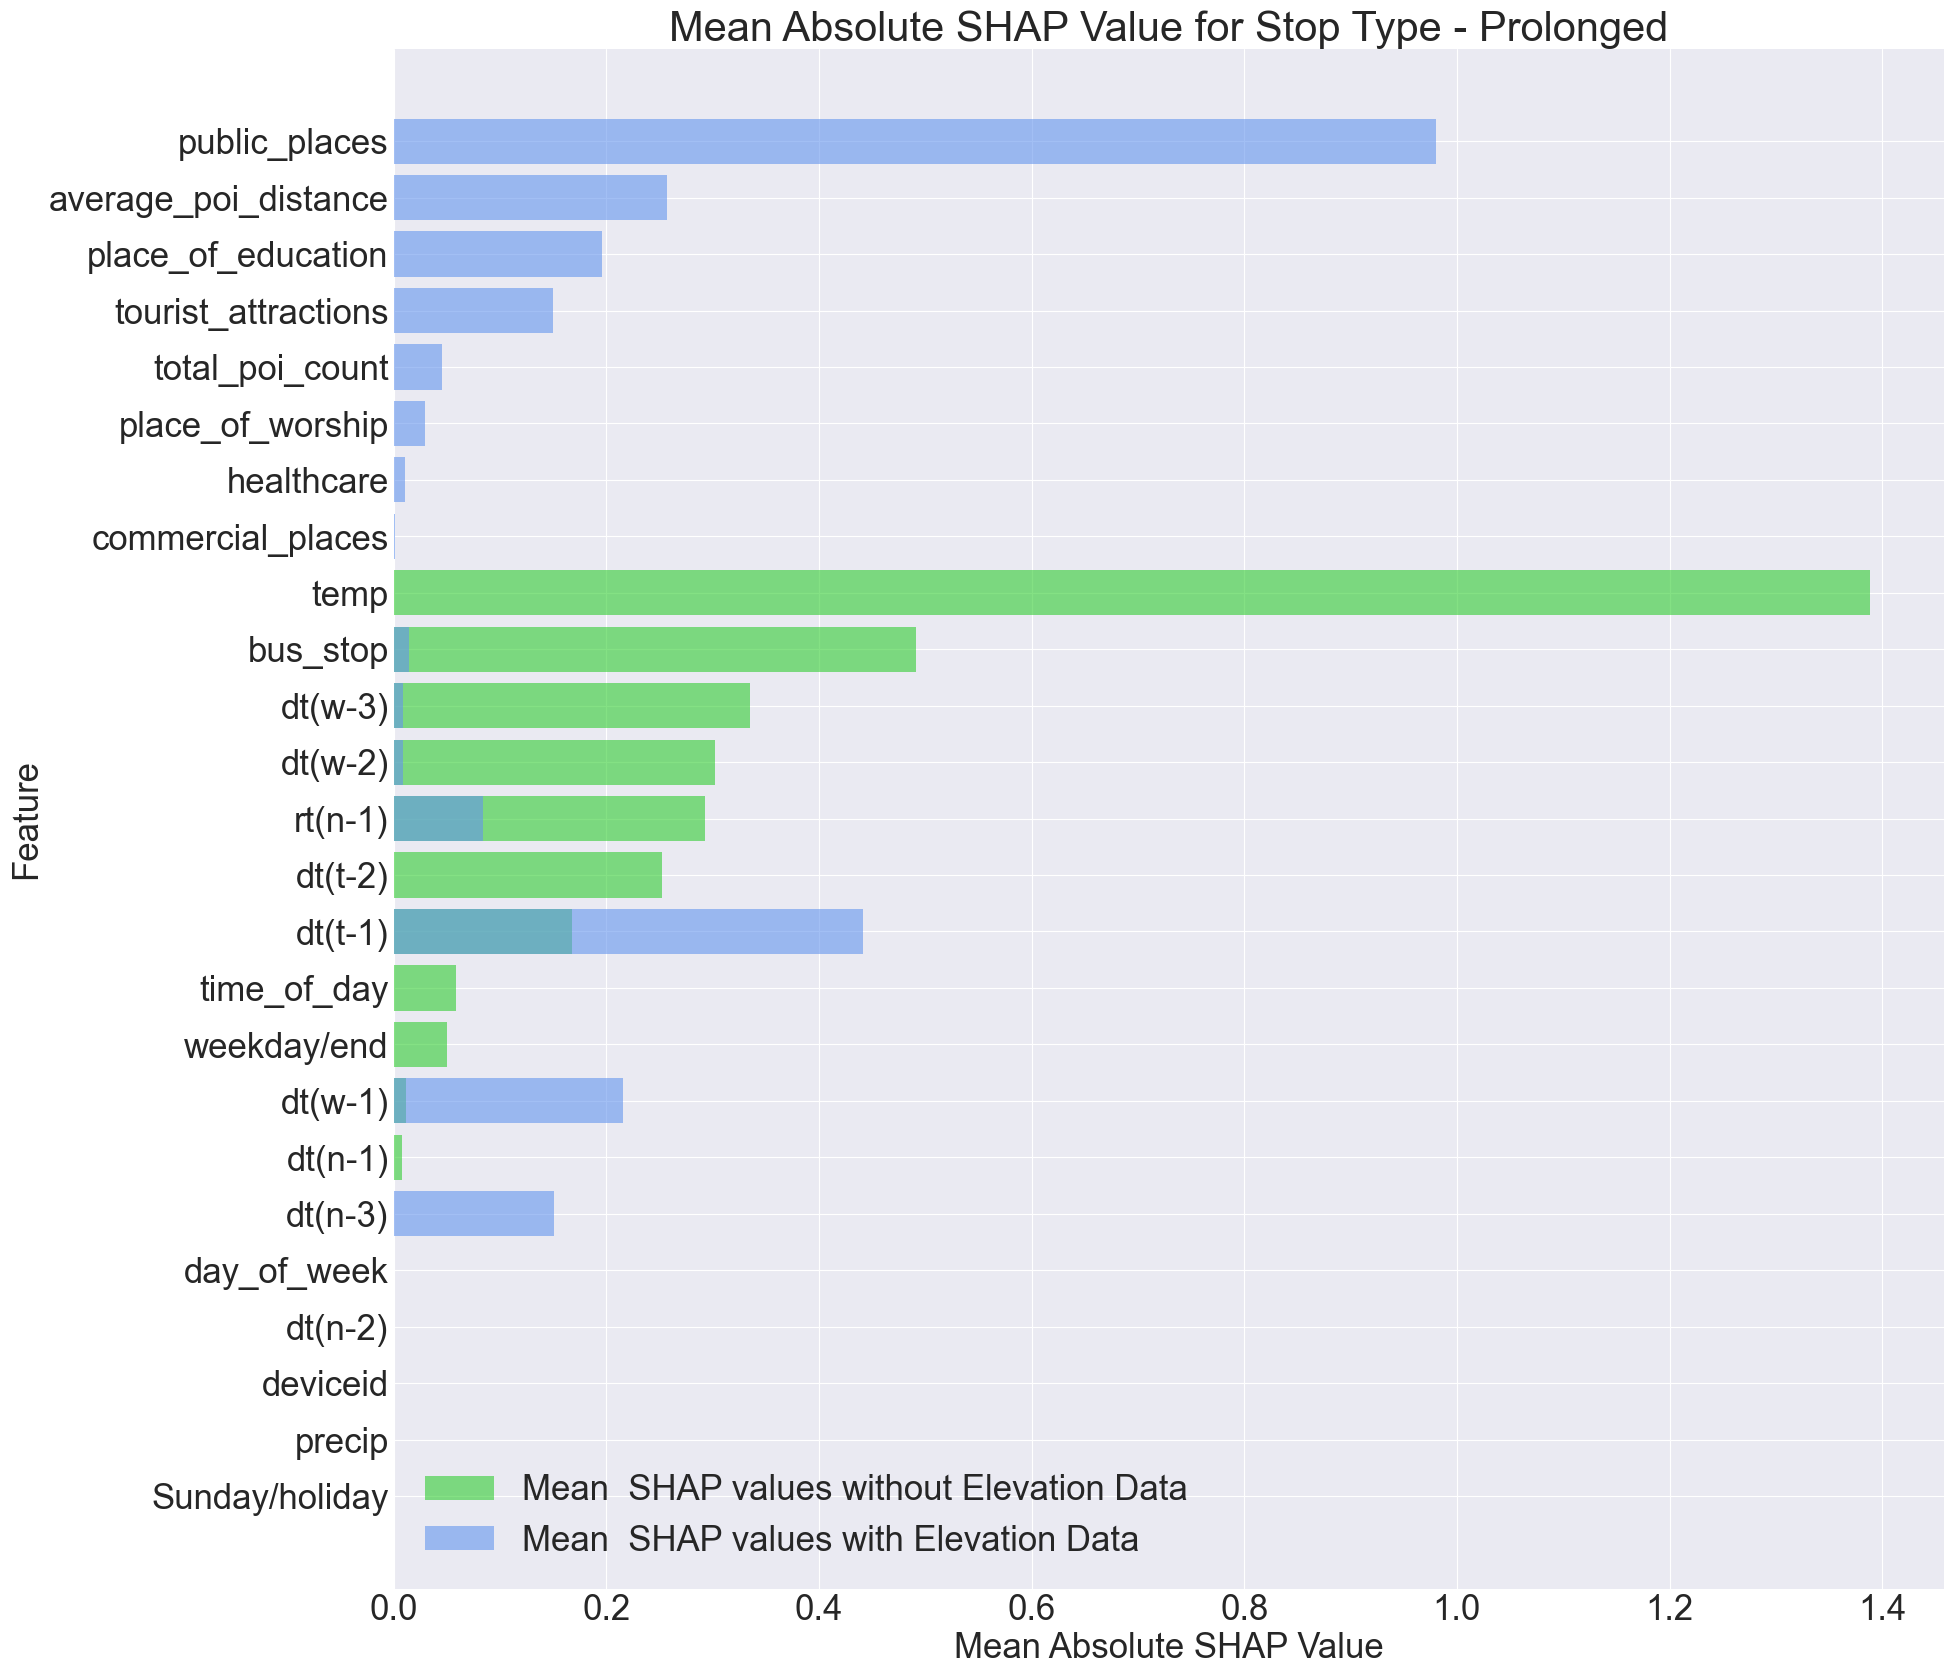

In [25]:
fig, ax = plt.subplots(figsize=[20,20])
plt.style.use('seaborn-v0_8-darkgrid')
ax.barh(y = shap_comp_class_2['feature'],width=shap_comp_class_2['importance'], color = 'limegreen',label = "Mean  SHAP values without Elevation Data",alpha = 0.6)
ax.barh(y = shap_v_class_2['feature'],width=shap_v_class_2['importance'], color = 'cornflowerblue',label = "Mean  SHAP values with Elevation Data", alpha = 0.6)
plt.title("Mean Absolute SHAP Value for Stop Type - Prolonged")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.legend()

In [26]:
import seaborn as sns

In [27]:
shap_model_1 = pd.merge(left=shap_v_class_0,right=shap_v_class_1,how='outer',on='feature')
shap_model_1 = pd.merge(left=shap_model_1,right=shap_v_class_2,how='outer',on='feature')

In [28]:
shap_model_1.rename(columns = {'importance_x':'brief','importance_y':'moderate','importance':'prolonged'},inplace =True)
shap_model_1


,feature,brief,moderate,prolonged
0,deviceid,0.000000,0.000000,0.000000
1,day_of_week,0.000000,0.000000,0.000000
2,time_of_day,0.000000,0.000000,0.000000
3,Sunday/holiday,0.000000,0.000000,0.000000
4,weekday/end,0.000000,0.000000,0.000000
5,dt(w-2),0.000000,0.039018,0.009091
6,precip,0.000000,0.351005,0.000000
7,temp,0.000000,0.000000,0.000000
8,commercial_places,0.000000,0.004714,0.001182
9,dt(n-1),0.000391,0.000000,0.000085


In [29]:
shap_model_2 = pd.merge(left=shap_comp_class_0,right=shap_comp_class_1,how='outer',on='feature')
shap_model_2 = pd.merge(left=shap_model_2,right=shap_comp_class_2,how='outer',on='feature')

In [30]:
shap_model_2.rename(columns = {'importance_x':'brief','importance_y':'moderate','importance':'prolonged'},inplace =True)
shap_model_2

,feature,brief,moderate,prolonged
0,deviceid,0.000000,0.000000,0.000000
1,day_of_week,0.000000,0.000041,0.000322
2,weekday/end,0.000000,0.007914,0.050601
3,precip,0.000000,0.000000,0.000000
4,dt(n-1),0.000000,0.047955,0.007698
5,time_of_day,0.002332,0.000109,0.059187
6,dt(n-3),0.017871,0.057815,0.000450
7,Sunday/holiday,0.021990,0.000000,0.000000
8,dt(w-2),0.103009,0.102980,0.302150
9,dt(n-2),0.168232,0.075445,0.000134


In [31]:
shap_model_1['tot'] = shap_model_1['brief'] + shap_model_1['moderate'] + shap_model_1['prolonged']
shap_model_1

,feature,brief,moderate,prolonged,tot
0,deviceid,0.000000,0.000000,0.000000,0.000000
1,day_of_week,0.000000,0.000000,0.000000,0.000000
2,time_of_day,0.000000,0.000000,0.000000,0.000000
3,Sunday/holiday,0.000000,0.000000,0.000000,0.000000
4,weekday/end,0.000000,0.000000,0.000000,0.000000
5,dt(w-2),0.000000,0.039018,0.009091,0.048109
6,precip,0.000000,0.351005,0.000000,0.351005
7,temp,0.000000,0.000000,0.000000,0.000000
8,commercial_places,0.000000,0.004714,0.001182,0.005897
9,dt(n-1),0.000391,0.000000,0.000085,0.000476


In [32]:
shap_model_1 = shap_model_1.sort_values(by='tot',ascending=True)
shap_model_1

,feature,brief,moderate,prolonged,tot
0,deviceid,0.000000,0.000000,0.000000,0.000000
1,day_of_week,0.000000,0.000000,0.000000,0.000000
2,time_of_day,0.000000,0.000000,0.000000,0.000000
3,Sunday/holiday,0.000000,0.000000,0.000000,0.000000
4,weekday/end,0.000000,0.000000,0.000000,0.000000
7,temp,0.000000,0.000000,0.000000,0.000000
9,dt(n-1),0.000391,0.000000,0.000085,0.000476
8,commercial_places,0.000000,0.004714,0.001182,0.005897
5,dt(w-2),0.000000,0.039018,0.009091,0.048109
15,healthcare,0.036948,0.001422,0.010568,0.048938


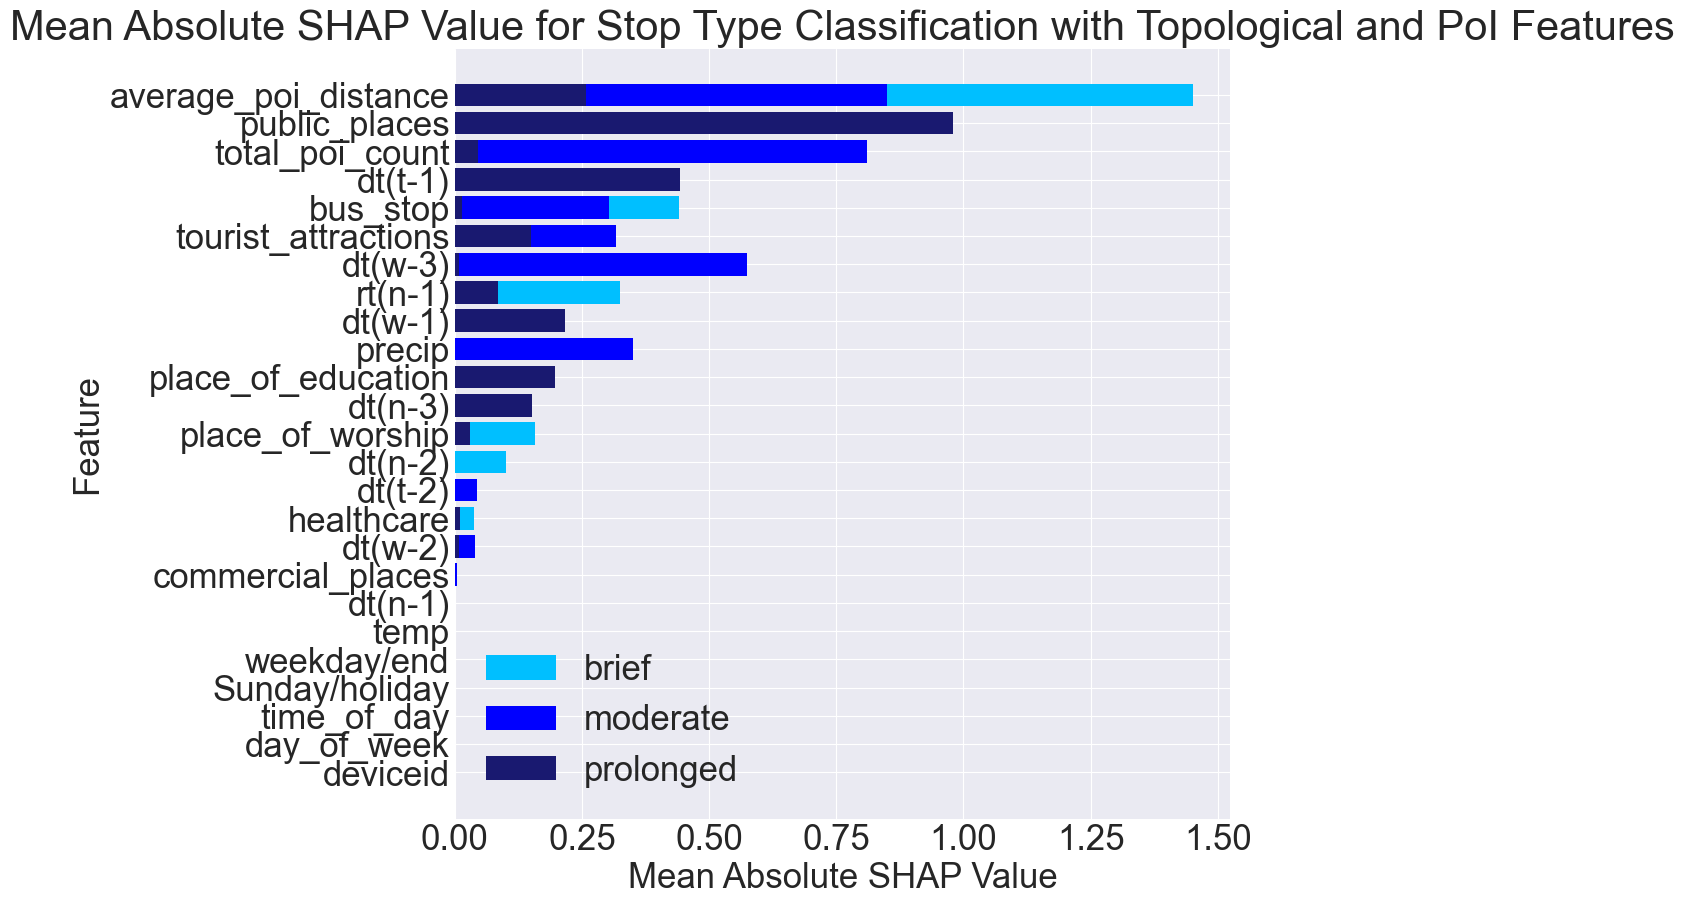

In [33]:
plt.figure(figsize = [10,10])
plt.barh(y= shap_model_1['feature'],width = shap_model_1['brief'], color = 'deepskyblue',label='brief')
plt.barh(y= shap_model_1['feature'],width = shap_model_1['moderate'],color='blue',label = 'moderate')
plt.barh(y= shap_model_1['feature'],width = shap_model_1['prolonged'],color='midnightblue', label = 'prolonged')
plt.title("Mean Absolute SHAP Value for Stop Type Classification with Topological and PoI Features")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.legend()

In [34]:
shap_model_2['tot'] = shap_model_2['brief'] + shap_model_2['moderate'] + shap_model_2['prolonged']
shap_model_2 = shap_model_2.sort_values(by='tot',ascending=True)
shap_model_2

,feature,brief,moderate,prolonged,tot
0,deviceid,0.000000,0.000000,0.000000,0.000000
3,precip,0.000000,0.000000,0.000000,0.000000
1,day_of_week,0.000000,0.000041,0.000322,0.000363
7,Sunday/holiday,0.021990,0.000000,0.000000,0.021990
4,dt(n-1),0.000000,0.047955,0.007698,0.055653
2,weekday/end,0.000000,0.007914,0.050601,0.058515
5,time_of_day,0.002332,0.000109,0.059187,0.061628
6,dt(n-3),0.017871,0.057815,0.000450,0.076135
9,dt(n-2),0.168232,0.075445,0.000134,0.243811
13,dt(w-1),0.302211,0.001947,0.011943,0.316101


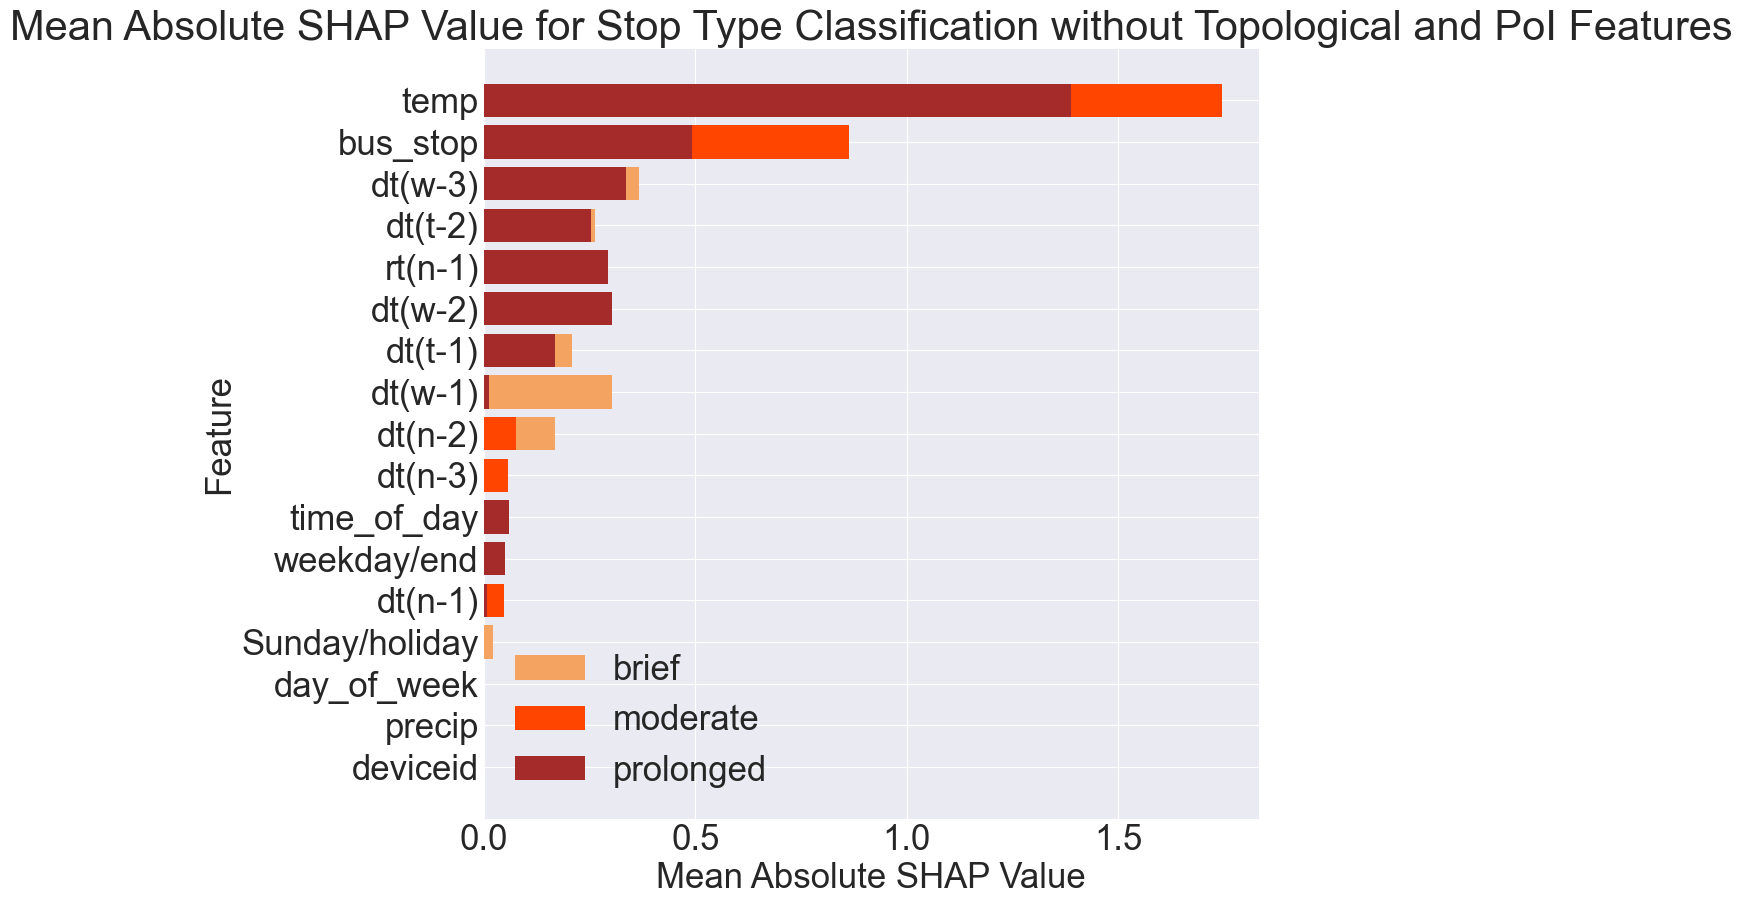

In [35]:
plt.figure(figsize = [10,10])
plt.barh(y= shap_model_2['feature'],width = shap_model_2['brief'], color = 'sandybrown',label='brief')
plt.barh(y= shap_model_2['feature'],width = shap_model_2['moderate'],color='orangered',label = 'moderate')
plt.barh(y= shap_model_2['feature'],width = shap_model_2['prolonged'],color='brown', label = 'prolonged')
plt.title("Mean Absolute SHAP Value for Stop Type Classification without Topological and PoI Features")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.legend()